In [2]:
# import 
import numpy as np
import pandas as pd

from zipfile import ZipFile
from urllib.request import urlopen

import datetime
import glob
import os
from io import BytesIO

from requests import get
from os import path, getcwd, makedirs, listdir 


from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### We have 3 different data sources in the web page. 
1. A CSV file for forgobike 2017 
2. A number of 12 zip files for forgobike 2018 for 12 months
3. A number of 4 zip files for forgobike 2019 for 4 months in year 2019
Note: There is another 5 months has a different name in 2019 wont be included here because they maigh be from different activities if we need to we easyly add another function for that. 

#### Load and save the data

###### Please Note: This only works after doing the explantory analysis since we are starting with reading the master.csv¶


In [4]:
df_master = pd.read_csv('master_updated.csv', low_memory=False) # the low memory is to avide Specify dtype option

In [5]:
df_master.shape

(2959104, 23)

In [6]:
## How many rider that we have. 
df_master['bike_id'].count()

2959104

In [12]:
df_master.bike_id.sample()

1044970    186
Name: bike_id, dtype: int64

##### What is the Monthly usege of the bike rides? 

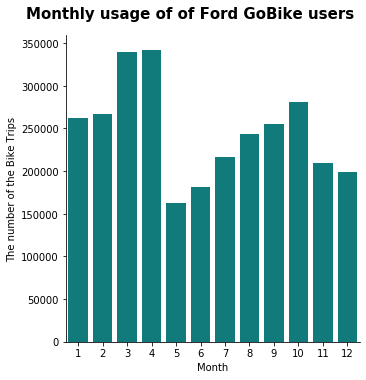

In [13]:
# monthly usege of the Bike Trips
x = sns.catplot(data=df_master, x='start_time_month', kind='count', color='darkcyan')
x.set_axis_labels("Month", "The number of the Bike Trips")
x.fig.suptitle('Monthly usage of of Ford GoBike users', y=1.05, fontsize=15, fontweight='bold')
plt.savefig('rids_each_months.png');

##### The months March, April and October have the most usage in the year for all users. 

###### Similar to what we did above let's see how users behavior in the weekdays.

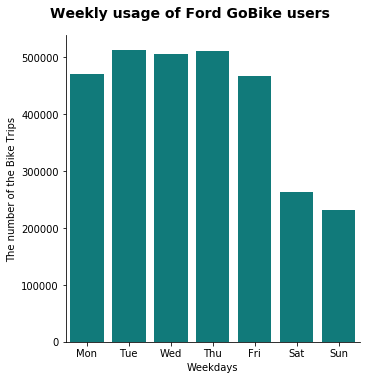

In [14]:
# set weekday to use it for order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# weekday usege of the system
x = sns.catplot(data=df_master, x='start_time_weekday', kind='count', color = 'darkcyan', order = weekday)
x.set_axis_labels("Weekdays", "The number of the Bike Trips")
x.fig.suptitle('Weekly usage of Ford GoBike users', y=1.05, fontsize=14, fontweight='bold')
plt.savefig('rides_weekdays.png');

###### In general the weekdays have more rides than weekends

###### Now let's take a look into the type of users 

In [15]:
# Create two main dataframe to work with 
customer = df_master.query('user_type == "Customer"')
subscriber = df_master.query('user_type == "Subscriber"')

In [16]:
# get the number of each User type
customer_count = customer['bike_id'].count()
subscriber_count = subscriber['bike_id'].count()

In [17]:
# Get the percentage of each user type of the main DataFrame
customer_group = customer_count / df_master['bike_id'].count()
subscriber_group = subscriber_count / df_master['bike_id'].count()

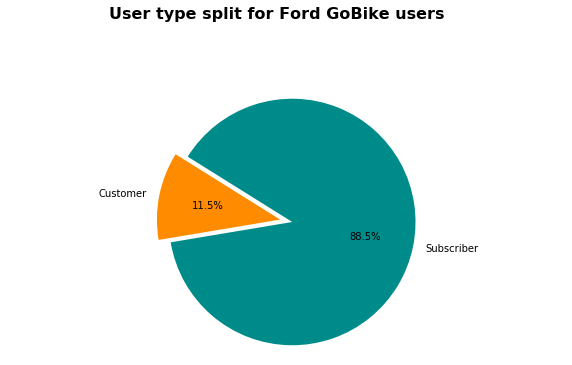

In [18]:
plt.figure(figsize = [10, 5])
# the pie chart
plt.subplot(1, 1, 1)

labels = ['Customer', 'Subscriber']
sizes = [customer_group, subscriber_group]
colors = ['darkorange', 'darkcyan']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=False, startangle=148)
plt.axis('equal')

plt.suptitle('User type split for Ford GoBike users', y=1.1, fontsize=16, fontweight='bold');

###### As you can see in the left side There are Only 11.5% of the users are customer whereas 88.5% are Subscriber

In [19]:
# Get the percentage of each gender for the customer type

cus_gender_female_count = customer.query('member_gender == "Female"')['bike_id'].count()
cus_gender_male_count = customer.query('member_gender == "Male"')['bike_id'].count()


customer_female = cus_gender_female_count / customer['bike_id'].count()
customer_male = cus_gender_male_count / customer['bike_id'].count()

In [20]:
# Get the percentage of each gender for the subscribers type

sub_gender_female_count = subscriber.query('member_gender == "Female"')['bike_id'].count()
sub_gender_male_count = subscriber.query('member_gender == "Male"')['bike_id'].count()


subscriber_female = sub_gender_female_count / subscriber['bike_id'].count()
subscriber_male = sub_gender_male_count / subscriber['bike_id'].count()


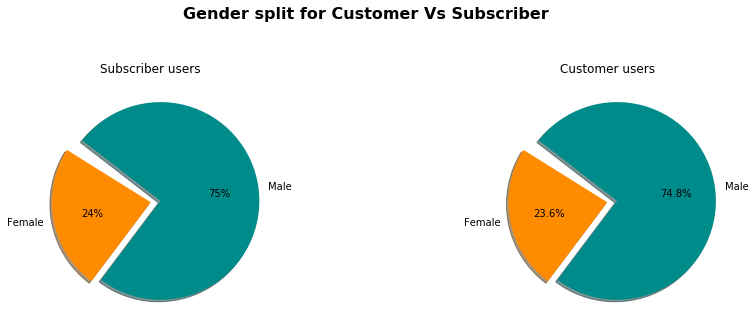

In [21]:

labels = ['Female', 'Male']
sizes1 = [customer_female, customer_male]
sizes2 = [subscriber_female, subscriber_male]
colors = ['darkorange', 'darkcyan']

# Make square figures and axes
plt.figure(1, figsize=(15,10))
the_grid = GridSpec(2, 2)

# the pie chart "Customer"
plt.subplot(the_grid[0,1], aspect=1, title='Customer users')
Cus_users_pie = plt.pie(sizes2, explode=(0, 0.1), labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=148)

# the pie chart "Subscriber"
plt.subplot(the_grid[0,0], aspect=1, title='Subscriber users')
sub_users_pie = plt.pie(sizes2, explode=(0, 0.1), labels=labels, colors = colors,
        autopct='%.0f%%', shadow=True, startangle=148)
plt.suptitle('Gender split for Customer Vs Subscriber', fontsize=16, fontweight='bold');

plt.show()

###### The trend in both user type is almost the same. The number of male is more in both of type users There almost no difference in the percentage of Female Vs Male between the Subscribers and the Customers as we can see on the pie charts above.  The males in customer  type of users are 74.8% whereas 23.6% are females . The males in the subscribers type of users are 75% whereas 24% are females.

Text(0.5, 1.013, 'Customer Vs Subscriber by the Group of Age for based on Gender ')

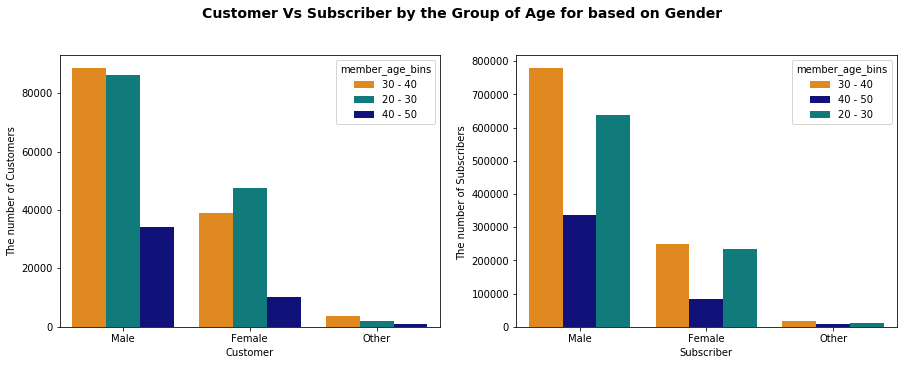

In [22]:
# set color to use in the next few charts
palette = {'20 - 30': 'darkcyan', '30 - 40': 'darkorange', '40 - 50': 'darkblue'}

plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="member_gender", hue="member_age_bins" 
                          , palette=palette, data=customer[customer['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])])

bar_chart.set_xlabel('Customer')
bar_chart.set_ylabel('The number of Customers')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="member_gender", hue="member_age_bins" 
                          , palette=palette, data=subscriber[subscriber['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])])
bar_chart.set_xlabel('Subscriber')
bar_chart.set_ylabel('The number of Subscribers ')
plt.suptitle('Customer Vs Subscriber by the Group of Age for based on Gender ', fontsize=14, y=1.013, fontweight='bold')


###### There is one siginfcant different btween Customers and subscribers for the group of Age based on Gender as you can see that the group of Age 20-30 are the most group for female in the customer type of users whereas the in the subscriber type the group of 30-40 of age for female have the highest number.  And both type of users have the same results for the male gender and others with the most number of users by the group of age. 

Text(0.5, 1.013, 'Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ')

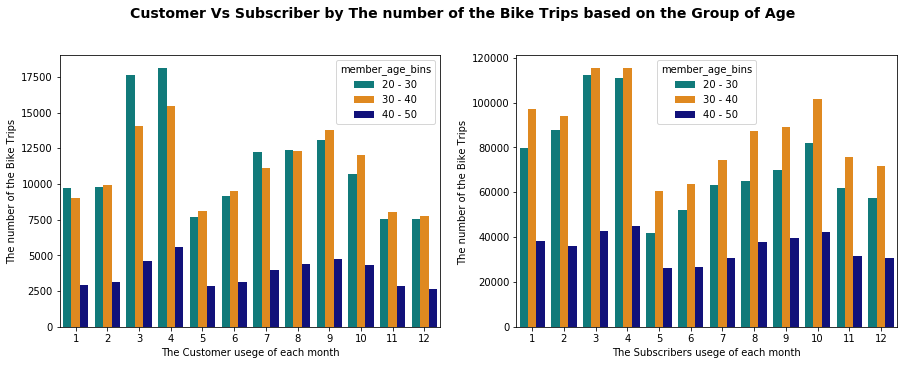

In [23]:
plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="start_time_month", hue="member_age_bins" 
                          , palette=palette, data=customer[customer['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])]
                          .sort_values(by=['start_time_month','member_age_bins']))

bar_chart.set_xlabel('The Customer usege of each month')
bar_chart.set_ylabel('The number of the Bike Trips')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="start_time_month", hue="member_age_bins" 
                          , palette=palette, data=subscriber[subscriber['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])]
                          .sort_values(by=['start_time_month','member_age_bins']))
bar_chart.set_xlabel('The Subscribers usege of each month')
bar_chart.set_ylabel('The number of the Bike Trips ')
plt.suptitle('Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ', fontsize=14, y=1.013, fontweight='bold')


###### In General the group of 30-40 of age in the subscribers type of years have the most usage of our system but this isn't always the case in the customer type of users as you can see on the left chart.  The Customer group differ in the few months where is the group of age 20-30 have the most trips and to be exact the months are Jan, Feb, March, April, July, Aug and The rest of the year the customer type of users have similar results of the subscribers type of ueres. Also we can see that the months 3,4 for both the users type has the most usage, and the months 8,9 and for both types of users have similar behavior whereas the it differ in the other months.

Text(0.5, 1.013, 'Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ')

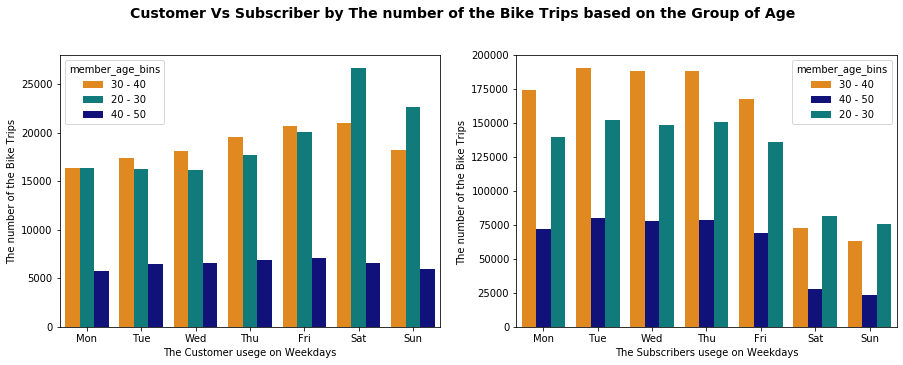

In [24]:
plt.figure(figsize = [15, 5])

# the bar chart
plt.subplot(1, 2, 1)
bar_chart = sns.countplot(x="start_time_weekday", hue='member_age_bins',palette=palette, data=customer[customer['member_age_bins']
                                                                                                                                              .isin(['20 - 30', '30 - 40', '40 - 50'])],order = weekday)

bar_chart.set_xlabel('The Customer usege on Weekdays')
bar_chart.set_ylabel('The number of the Bike Trips')
plt.subplot(1, 2, 2)
bar_chart = sns.countplot(x="start_time_weekday", hue='member_age_bins',palette=palette, data=subscriber[subscriber['member_age_bins']
                                                                                                                                              .isin(['20 - 30', '30 - 40', '40 - 50'])],order = weekday)
bar_chart.set_xlabel('The Subscribers usege on Weekdays')
bar_chart.set_ylabel('The number of the Bike Trips ')
plt.suptitle('Customer Vs Subscriber by The number of the Bike Trips based on the Group of Age ', fontsize=14, y=1.013, fontweight='bold')


##### An overall of the  Customer Vs Sub weekly usage as you can see in the charts above that the customer type of users have less usegs during the weekdays and more on the weekends whereas quite the opposite for the subscribers type of users raides more during the weekdays rather than weekends and the more interesting part here is that in both type of users the group of age 20-30 ride more on the weekends and the group of 30-40 of age rides more on weekdays.

### Conclusion:
<b>In general The months March and April and October have the most usage in the year for all users. <br>
In general the weekdays have more rides than weekends for all users.<br>
There are Only 11.5% of the users are customer whereas 88.5% are Subscriber<br>
The trend in both user type is almost the same. The number of male is more in both of type users There almost no difference in the percentage of Female Vs Male between the Subscribers and the Customers.  The males in customer  type of users are 74.8% whereas 23.6% are females . The males in the subscribers type of users are 75% whereas 24% are females.<br>
The most group of age in the Customer that use the system are 20-30 then 30-40 of age.<br>
The group of age 20-30 in the customer type of users for the female gender have the hi<br>
In General the group of 30-40 of age in the subscribers type of years have the most usage of our system but this isn't always the case in the customer type of users as you can see on the left chart. The Customer group differ in the few months where is the group of age 20-30 have the most trips and to be exact the months are Jan, Feb, March, April, July, Aug and The rest of the year the customer type of users have similar results of the subscribers type of ueres. Also we can see that the months 3,4 for both the users type has the most usage, and the months 8,9 and for both types of users have similar behavior whereas the it differ in the other months.<br>
An overall of the  Customer Vs Sub weekly usage as you can see in the charts above that the customer type of users have less usegs during the weekdays and more on the weekends whereas quite the opposite for the subscribers type of users raides more during the weekdays rather than weekends and the more interesting part here is that in both type of users the group of age 20-30 ride more on the weekends and the group of 30-40 of age rides more on weekdays.<br>
The most group of age in the subscribers that use the system are 30-40 then 20-30-40 of age.<br> The subscribers use the system more during the weekdays<b/>
